In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
from sklearn.utils import shuffle
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression

In [2]:
imdb = pd.read_csv(r'imdb.csv', encoding='latin-1')
imdb.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,21,Color,Jon M. Chu,84,115,209,41,Sean Kingston,569,73000942,...,233,English,USA,G,13000000,2011,69,1.6,1.85,62000
1,22,Color,Bob Clark,32,88,84,177,Vanessa Angel,650,9109322,...,129,English,Germany,PG,20000000,2004,384,1.9,2.35,0
2,23,Color,Jason Friedberg,111,88,82,329,Tony Cox,869,14174654,...,359,English,USA,PG-13,25000000,2008,624,1.9,1.85,0
3,24,Color,Don Michael Paul,25,93,70,442,Faizon Love,692,5694308,...,46,English,USA,PG-13,7000000,2007,585,2.0,1.85,446
4,25,Color,Vondie Curtis-Hall,66,104,170,202,Max Beesley,736,4273372,...,308,English,USA,PG-13,22000000,2001,218,2.1,2.35,0


In [3]:
imdb.shape

(3598, 28)

In [4]:
y = imdb['gross']
x = imdb['num_voted_users']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
print(results.params)

yhat1=model.predict(results.params)
MSE_train1= np.mean((y-yhat1)**2)
print(MSE_train1)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     2355.
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:37:32   Log-Likelihood:                -69249.
No. Observations:                3598   AIC:                         1.385e+05
Df Residuals:                    3596   BIC:                         1.385e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.334e+07   1.12e+06     

In [5]:
imdb['gross'].mean()

54628082.780155644

In [6]:
y = imdb['gross']
x = imdb['cast_total_facebook_likes']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
print(results.params)

yhat2=model.predict(results.params)
MSE_train2= np.mean((y-yhat2)**2)
print(MSE_train2)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.83e-42
Time:                        19:37:32   Log-Likelihood:                -70062.
No. Observations:                3598   AIC:                         1.401e+05
Df Residuals:                    3596   BIC:                         1.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [7]:
y = imdb['gross']
x = imdb['imdb_score']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
print(results.params)

yhat3=model.predict(results.params)
MSE_train3= np.mean((y-yhat3)**2)
print(MSE_train3)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           3.62e-51
Time:                        19:37:32   Log-Likelihood:                -70042.
No. Observations:                3598   AIC:                         1.401e+05
Df Residuals:                    3596   BIC:                         1.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.283e+07   7.12e+06     -7.418      0.0

In [8]:
y = imdb['gross']
x = imdb['movie_facebook_likes']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
print(results.params)

yhat4=model.predict(results.params)
MSE_train4= np.mean((y-yhat4)**2)
print(MSE_train4)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     566.5
Date:                Tue, 04 Dec 2018   Prob (F-statistic):          2.06e-116
Time:                        19:37:32   Log-Likelihood:                -69892.
No. Observations:                3598   AIC:                         1.398e+05
Df Residuals:                    3596   BIC:                         1.398e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  4.32e+07 

In [9]:
feats= ['num_voted_users', 'cast_total_facebook_likes','imdb_score','movie_facebook_likes']
MSE= [MSE_train1, MSE_train2, MSE_train3, MSE_train4]

In [10]:
stepone= pd.DataFrame(feats, MSE)

In [11]:
print(stepone)

                                      0
3.054039e+15            num_voted_users
4.798398e+15  cast_total_facebook_likes
4.745457e+15                 imdb_score
4.366027e+15       movie_facebook_likes


In [12]:
feats= ['cast_total_facebook_likes','imdb_score','movie_facebook_likes']
MSE_train=[]
for i in range(0,3):
    X=imdb[[feats[i], 'num_voted_users']]
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    print(results.params)

    yhat=model.predict(results.params)
    MSE_train.append(np.mean((y-yhat)**2))
print(MSE_train)
    

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1203.
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:37:32   Log-Likelihood:                -69234.
No. Observations:                3598   AIC:                         1.385e+05
Df Residuals:                    3595   BIC:                         1.385e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [13]:
MSE_train_step3=[3027949289211370.5, 3023809265855595.5, 3040642034034130.0]
step3=pd.DataFrame(feats,MSE_train_step3 )

In [14]:
print(step3)

                                      0
3.027949e+15  cast_total_facebook_likes
3.023809e+15                 imdb_score
3.040642e+15       movie_facebook_likes


In [15]:
feats= ['cast_total_facebook_likes','movie_facebook_likes']
MSE_train=[]
for i in range(0,2):
    X=imdb[[feats[i],'imdb_score','num_voted_users']]
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    print(results.params)

    yhat=model.predict(results.params)
    MSE_train.append(np.mean((y-yhat)**2))
print(MSE_train)
    

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     822.0
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:37:32   Log-Likelihood:                -69215.
No. Observations:                3598   AIC:                         1.384e+05
Df Residuals:                    3594   BIC:                         1.385e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [16]:
MSE_train_step4=[2997328339443963.5, 3008645615555352.5]
step4=pd.DataFrame(feats,MSE_train_step4)

In [17]:
print(step4)

                                      0
2.997328e+15  cast_total_facebook_likes
3.008646e+15       movie_facebook_likes


In [18]:
feats= ['num_voted_users', 'cast_total_facebook_likes','imdb_score','movie_facebook_likes']
y = imdb['gross']
x = imdb[feats]
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
print(results.params)

yhat2=model.predict(results.params)
MSE_train2= np.mean((y-yhat2)**2)
print(MSE_train2)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     622.3
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:37:32   Log-Likelihood:                -69208.
No. Observations:                3598   AIC:                         1.384e+05
Df Residuals:                    3593   BIC:                         1.385e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [19]:
#['num_voted_users', 'cast_total_facebook_likes','imdb_score','movie_facebook_likes']

imdb = shuffle(imdb, random_state=0)

reg=LinearRegression()
kf=KFold(n_splits=10, random_state=1, shuffle = True)

X=imdb[['num_voted_users']]
y=imdb['gross']
pred_train=[]
pred_test=[]
trainE_scores=[]
testE_scores=[]

for train, test in kf.split(X):
    train_data=X.iloc[train]
    train_pred=y.iloc[train]
    reg.fit(train_data,train_pred)
    
    train_pred_reg=reg.predict(X.iloc[train])
    pred_train.append(train_pred_reg)
    trainE_scores.append(np.mean((y.iloc[train]-train_pred_reg)**2))
    
    test_pred=reg.predict(X.iloc[test])
    testE_scores.append(np.mean((y.iloc[test]-test_pred)**2))
    pred_test.append(test_pred)
    
error_t=pd.DataFrame([trainE_scores,testE_scores]).T
error_t.columns=['train', 'test']

trainE_mse=np.mean(error_t['train'])
testE_mse=np.mean(error_t['test'])
print(trainE_mse, testE_mse)

3053649275134896.0 3061384404514316.0


In [20]:
#['num_voted_users', 'cast_total_facebook_likes','imdb_score','movie_facebook_likes']

imdb = shuffle(imdb, random_state=0)

reg=LinearRegression()
kf=KFold(n_splits=10, random_state=1, shuffle = True)

X=imdb[['num_voted_users','imdb_score']]
y=imdb['gross']
pred_train=[]
pred_test=[]
trainE_scores=[]
testE_scores=[]

for train, test in kf.split(X):
    train_data=X.iloc[train]
    train_pred=y.iloc[train]
    reg.fit(train_data,train_pred)
    
    train_pred_reg=reg.predict(X.iloc[train])
    pred_train.append(train_pred_reg)
    trainE_scores.append(np.mean((y.iloc[train]-train_pred_reg)**2))
    
    test_pred=reg.predict(X.iloc[test])
    testE_scores.append(np.mean((y.iloc[test]-test_pred)**2))
    pred_test.append(test_pred)
    
error_t=pd.DataFrame([trainE_scores,testE_scores]).T
error_t.columns=['train', 'test']

trainE_mse=np.mean(error_t['train'])
testE_mse=np.mean(error_t['test'])
print(trainE_mse, testE_mse)

3023056650372108.5 3037799524712943.5


In [21]:
#['num_voted_users', 'cast_total_facebook_likes','imdb_score','movie_facebook_likes']

imdb = shuffle(imdb, random_state=0)

reg=LinearRegression()
kf=KFold(n_splits=10, random_state=1, shuffle = True)

X=imdb[['num_voted_users','imdb_score','cast_total_facebook_likes']]
y=imdb['gross']
pred_train=[]
pred_test=[]
trainE_scores=[]
testE_scores=[]

for train, test in kf.split(X):
    train_data=X.iloc[train]
    train_pred=y.iloc[train]
    reg.fit(train_data,train_pred)
    
    train_pred_reg=reg.predict(X.iloc[train])
    pred_train.append(train_pred_reg)
    trainE_scores.append(np.mean((y.iloc[train]-train_pred_reg)**2))
    
    test_pred=reg.predict(X.iloc[test])
    testE_scores.append(np.mean((y.iloc[test]-test_pred)**2))
    pred_test.append(test_pred)
    
error_t=pd.DataFrame([trainE_scores,testE_scores]).T
error_t.columns=['train', 'test']

trainE_mse=np.mean(error_t['train'])
testE_mse=np.mean(error_t['test'])
print(trainE_mse, testE_mse)

2994809809945281.5 3047107180208321.0


In [22]:
#['num_voted_users', 'cast_total_facebook_likes','imdb_score','movie_facebook_likes']

imdb = shuffle(imdb, random_state=0)

reg=LinearRegression()
kf=KFold(n_splits=10, random_state=1, shuffle = True)

X=imdb[['num_voted_users','imdb_score', 'cast_total_facebook_likes','movie_facebook_likes']]
y=imdb['gross']
pred_train=[]
pred_test=[]
trainE_scores=[]
testE_scores=[]

for train, test in kf.split(X):
    train_data=X.iloc[train]
    train_pred=y.iloc[train]
    reg.fit(train_data,train_pred)
    
    train_pred_reg=reg.predict(X.iloc[train])
    pred_train.append(train_pred_reg)
    trainE_scores.append(np.mean((y.iloc[train]-train_pred_reg)**2))
    
    test_pred=reg.predict(X.iloc[test])
    testE_scores.append(np.mean((y.iloc[test]-test_pred)**2))
    pred_test.append(test_pred)
    
error_t=pd.DataFrame([trainE_scores,testE_scores]).T
error_t.columns=['train', 'test']

trainE_mse=np.mean(error_t['train'])
testE_mse=np.mean(error_t['test'])
print(trainE_mse, testE_mse)

2983565669845253.0 3027820026580303.0


<IPython.core.display.Javascript object>


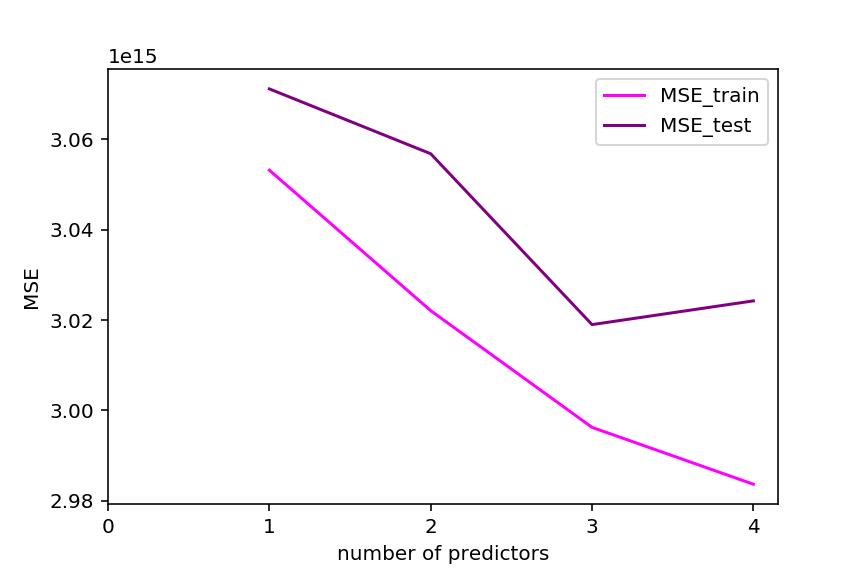

Text(0,0.5,'MSE')

In [31]:
%matplotlib notebook
MSE_train=[3053158594095970.5,3022074087331693.0,2996251272393357.0,2983665463560067.0]
MSE_test=[3071140720377484.0,3056792070068005.5,3018986101982309.5,3024235475973454.0]
plt.plot(range(1,5),MSE_train, color='magenta')
plt.plot(range(1,5), MSE_test, color='purple')
plt.legend(['MSE_train','MSE_test'])
plt.xticks(np.arange(5))
plt.xlabel('number of predictors')
plt.ylabel('MSE')

In [24]:
from sklearn.utils import resample
#boot = resample(imdb, replace=True, n_samples=3598, random_state=1)
#print('Bootstrap Sample: %s' % boot)
params = []

for i in range(0,1000):
    boot = resample(imdb, replace=True, n_samples=3598)
    feats= ['num_voted_users', 'cast_total_facebook_likes','imdb_score']
    y = boot['gross']
    x = boot[feats]
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    params.append(results.params)

In [25]:
par = pd.DataFrame(params)

In [26]:
std=par.std(axis=0)
mean=par.mean(axis=0)

In [27]:
cimax=[]
cimin=[]
for i in range(0,4):
    cimax.append(mean[i] + 1.96*std[i])
    cimin.append(mean[i] - 1.96*std[i])

for a,b in zip(cimin, cimax):
    print(a,b)

46387255.30350511 68524483.81399569
263.07061999652365 343.1580356105544
62.66998503885452 551.6944907973037
-8074723.11237638 -4056744.7877522865


In [28]:
yhat=  5.764245e+07+ 3.008499e+02*imdb['num_voted_users'] + 3.127116e+02*imdb['cast_total_facebook_likes'] - 6.087833e+06*imdb['imdb_score']

<IPython.core.display.Javascript object>


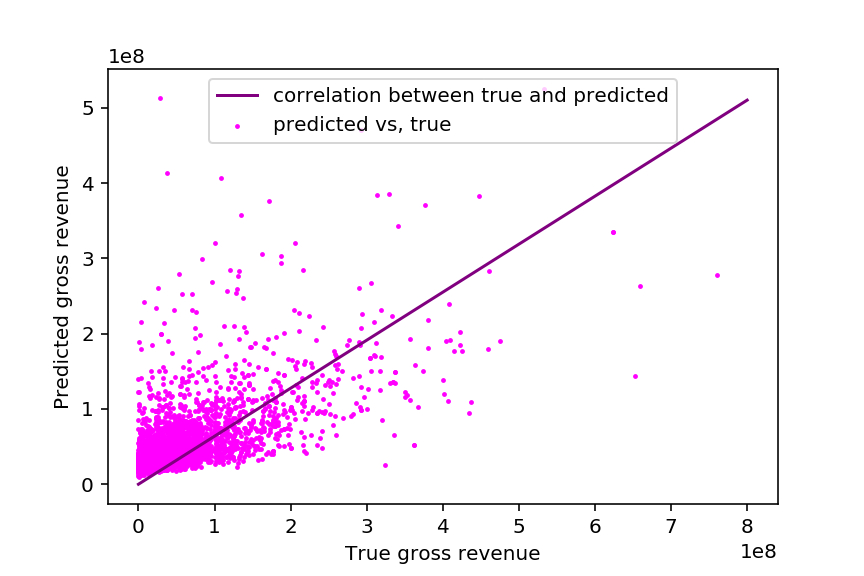

In [29]:
%matplotlib notebook

plt.scatter( imdb['gross'], yhat, color='magenta', s=2)
x=np.linspace(0,8e+8, num=10 )
y=0.6378197955459448*x 
plt.plot(x,y, color='purple')

plt.xlabel('True gross revenue')
plt.ylabel('Predicted gross revenue')
plt.legend(['correlation between true and predicted', 'predicted vs, true'])
plt.show()

In [30]:
import scipy 
scipy.stats.pearsonr(yhat, imdb['gross'])

(0.6378197955459448, 0.0)